In [1]:
import os, shutil
import warnings
warnings.filterwarnings('ignore')
import pathlib


In [2]:
# %pip install -q -U keras-tuner


In [3]:
# os.getcwd()

In [4]:


# original_dataset_dir = '/home/kailash/VScode Python projects/tf/conv/kaggle_dataset/train'


In [5]:

base_dir = '/home/kailash/VScode Python projects/tf/conv/small_dataset/'




In [6]:
base_dir

'/home/kailash/VScode Python projects/tf/conv/small_dataset/'

### Folders for train,test,validation data ###

In [7]:
train_dir = os.path.join(base_dir,'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')


In [8]:
train_dir

'/home/kailash/VScode Python projects/tf/conv/small_dataset/train'

### Directory for cat and dog images for train test validation data ###

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')

test_dogs_dir = os.path.join(test_dir, 'dogs')


#### Copy from kaggle train dataset to their respective directories ####

In [10]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [11]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [12]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [13]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [14]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [15]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [16]:
import tensorflow as tf

2022-09-20 15:20:28.278840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 15:20:28.607309: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-20 15:20:29.700219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/cuda/include:/usr/lib/cuda/lib64::/home/kailash/anaconda3/envs/tensorflow1/lib/
2022-09-20 15:20:29.700309: W tensorflow/stream_executor/platform/default/dso_loa

In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-09-20 15:20:31.185342: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-20 15:20:31.215089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-20 15:20:31.215331: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [18]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

In [19]:
model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Resizing(150,150))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.RandomRotation(0.2))
model.add(tf.keras.layers.RandomZoom(0.2))
model.add(tf.keras.layers.RandomFlip("horizontal_and_vertical"))
model.add(tf.keras.layers.Conv2D(32,(3,3),padding = "same",activation="relu",input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3),padding = "same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


2022-09-20 15:20:31.393684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 15:20:31.394999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-20 15:20:31.395535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-20 15:20:31.395938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [20]:

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4,decay=1e-6),metrics=['acc'])

In [21]:

train_dir = pathlib.Path(train_dir)

In [22]:
train_ds = tf.data.Dataset.list_files(str(train_dir/'*/*'), shuffle=False)


In [23]:
validation_dir = pathlib.Path(validation_dir)

In [24]:
val_ds = tf.data.Dataset.list_files(str(validation_dir/'*/*'), shuffle=False)


In [25]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#   train_dir,
#   seed=123,
#   image_size=(150, 150),
#   batch_size=40)

In [26]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#   validation_dir,
#   seed=123,
#   image_size=(150, 150),
#   batch_size=40)

In [27]:
# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

In [28]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)

In [29]:
# import numpy as np

In [30]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [31]:
IMG_SIZE = 150

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [32]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),

])

In [33]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == ['cats','dogs']
  # Integer encode the label
  return tf.argmax(one_hot)

In [34]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [150, 150])

In [35]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [36]:
AUTOTUNE = tf.data.AUTOTUNE

In [37]:
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [38]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(40)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

In [39]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("cats_dog",save_best_only=True)

In [40]:
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [41]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_logdir = get_run_logdir()


In [42]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir, profile_batch='10, 15',histogram_freq=1)

2022-09-20 15:20:37.214176: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-09-20 15:20:37.214278: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2022-09-20 15:20:37.214778: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2022-09-20 15:20:37.370444: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2022-09-20 15:20:37.373523: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


In [43]:
history = model.fit(train_ds,batch_size = 40, epochs=100,validation_data=val_ds,callbacks=[checkpoint_cb,tensorboard_cb])

Epoch 1/100


2022-09-20 15:20:45.869034: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-20 15:20:46.633068: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-20 15:20:46.633816: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-20 15:20:46.633843: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-20 15:20:46.635016: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-20 15:20:46.635061: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-09-20 15:20:47.104127: I tensorflow/stream_executor/cuda/c

 9/50 [====>.........................] - ETA: 8s - loss: 0.6109 - acc: 0.8056

2022-09-20 15:20:50.935527: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-09-20 15:20:50.935562: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


14/50 [=======>......................] - ETA: 9s - loss: 0.6511 - acc: 0.7464

2022-09-20 15:20:52.990609: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-09-20 15:20:52.999033: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed
2022-09-20 15:20:53.372082: I tensorflow/core/profiler/backends/gpu/cupti_collector.cc:521]  GpuTracer has collected 50073 callback api events and 50057 activity events. 
2022-09-20 15:20:53.961069: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2022-09-20 15:20:54.675038: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs/run_2022_09_20-15_20_37/plugins/profile/2022_09_20_15_20_53

2022-09-20 15:20:55.198187: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2022_09_20-15_20_37/plugins/profile/2022_09_20_15_20_53/kailash-ASUS-TUF-Gaming-A17-FA706IC-FA766IC.trace.json.gz
2022-09-20 15:20:56.094224: I tensorflow/

50/50 [==============================] - ETA: 0s - loss: 0.6787 - acc: 0.6105WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-20 15:21:15.075690: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


50/50 [==============================] - 38s 537ms/step - loss: 0.6787 - acc: 0.6105 - val_loss: 0.7009 - val_acc: 0.5000
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.7062 - acc: 0.5025WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-20 15:21:36.566868: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


50/50 [==============================] - 21s 431ms/step - loss: 0.7062 - acc: 0.5025 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 3/100
50/50 [==============================] - ETA: 0s - loss: 0.6976 - acc: 0.4835WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-20 15:21:58.360765: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


50/50 [==============================] - 22s 443ms/step - loss: 0.6976 - acc: 0.4835 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 4/100
50/50 [==============================] - ETA: 0s - loss: 0.6935 - acc: 0.5050

2022-09-20 15:22:09.566689: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


50/50 [==============================] - 11s 224ms/step - loss: 0.6935 - acc: 0.5050 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 5/100
50/50 [==============================] - ETA: 0s - loss: 0.6936 - acc: 0.4990WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets
2022-09-20 15:22:32.781553: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1274019840 exceeds 10% of free system memory.


50/50 [==============================] - 23s 469ms/step - loss: 0.6936 - acc: 0.4990 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 6/100
50/50 [==============================] - ETA: 0s - loss: 0.6934 - acc: 0.4975WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 21s 421ms/step - loss: 0.6934 - acc: 0.4975 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 7/100
50/50 [==============================] - ETA: 0s - loss: 0.6934 - acc: 0.4815WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 22s 449ms/step - loss: 0.6934 - acc: 0.4815 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 8/100
50/50 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.4995WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 22s 446ms/step - loss: 0.6933 - acc: 0.4995 - val_loss: 0.6926 - val_acc: 0.4990
Epoch 9/100
50/50 [==============================] - 11s 225ms/step - loss: 0.6930 - acc: 0.5285 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 10/100
50/50 [==============================] - 13s 254ms/step - loss: 0.6979 - acc: 0.5000 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 11/100
50/50 [==============================] - 12s 243ms/step - loss: 0.6938 - acc: 0.4770 - val_loss: 0.6928 - val_acc: 0.5060
Epoch 12/100
50/50 [==============================] - ETA: 0s - loss: 0.6923 - acc: 0.5030WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 23s 465ms/step - loss: 0.6923 - acc: 0.5030 - val_loss: 0.6917 - val_acc: 0.5300
Epoch 13/100
50/50 [==============================] - 11s 230ms/step - loss: 0.6868 - acc: 0.5545 - val_loss: 0.6951 - val_acc: 0.4990
Epoch 14/100
50/50 [==============================] - ETA: 0s - loss: 0.6991 - acc: 0.4740WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 23s 468ms/step - loss: 0.6991 - acc: 0.4740 - val_loss: 0.6897 - val_acc: 0.5240
Epoch 15/100
50/50 [==============================] - 10s 209ms/step - loss: 0.6919 - acc: 0.4920 - val_loss: 0.6900 - val_acc: 0.5290
Epoch 16/100
50/50 [==============================] - ETA: 0s - loss: 0.6893 - acc: 0.5180WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 22s 443ms/step - loss: 0.6893 - acc: 0.5180 - val_loss: 0.6889 - val_acc: 0.5480
Epoch 17/100
50/50 [==============================] - 11s 213ms/step - loss: 0.6883 - acc: 0.5405 - val_loss: 0.6899 - val_acc: 0.5230
Epoch 18/100
50/50 [==============================] - ETA: 0s - loss: 0.6888 - acc: 0.4945WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 22s 440ms/step - loss: 0.6888 - acc: 0.4945 - val_loss: 0.6878 - val_acc: 0.5600
Epoch 19/100
50/50 [==============================] - 11s 213ms/step - loss: 0.6702 - acc: 0.5795 - val_loss: 0.8960 - val_acc: 0.5020
Epoch 20/100
50/50 [==============================] - 11s 224ms/step - loss: 0.7123 - acc: 0.5445 - val_loss: 0.7174 - val_acc: 0.5030
Epoch 21/100
50/50 [==============================] - 11s 220ms/step - loss: 0.7072 - acc: 0.4580 - val_loss: 0.6886 - val_acc: 0.5380
Epoch 22/100
50/50 [==============================] - 11s 225ms/step - loss: 0.6861 - acc: 0.5165 - val_loss: 0.6882 - val_acc: 0.5490
Epoch 23/100
50/50 [==============================] - 10s 210ms/step - loss: 0.6847 - acc: 0.5390 - val_loss: 0.6891 - val_acc: 0.5510
Epoch 24/100
50/50 [==============================] - ETA: 0s - loss: 0.6829 - acc: 0.5450WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for th

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 21s 428ms/step - loss: 0.6829 - acc: 0.5450 - val_loss: 0.6864 - val_acc: 0.5670
Epoch 25/100
50/50 [==============================] - 10s 209ms/step - loss: 0.6775 - acc: 0.5710 - val_loss: 0.6889 - val_acc: 0.5110
Epoch 26/100
50/50 [==============================] - 12s 239ms/step - loss: 0.6877 - acc: 0.5420 - val_loss: 0.6874 - val_acc: 0.5220
Epoch 27/100
50/50 [==============================] - ETA: 0s - loss: 0.6847 - acc: 0.5490WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 23s 456ms/step - loss: 0.6847 - acc: 0.5490 - val_loss: 0.6855 - val_acc: 0.5500
Epoch 28/100
50/50 [==============================] - 10s 205ms/step - loss: 0.6639 - acc: 0.5970 - val_loss: 0.7930 - val_acc: 0.5010
Epoch 29/100
50/50 [==============================] - 10s 205ms/step - loss: 0.7064 - acc: 0.5215 - val_loss: 0.6891 - val_acc: 0.5220
Epoch 30/100
50/50 [==============================] - 10s 202ms/step - loss: 0.6841 - acc: 0.5370 - val_loss: 0.6884 - val_acc: 0.5700
Epoch 31/100
50/50 [==============================] - ETA: 0s - loss: 0.6734 - acc: 0.6155WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 20s 402ms/step - loss: 0.6734 - acc: 0.6155 - val_loss: 0.6791 - val_acc: 0.5700
Epoch 32/100
50/50 [==============================] - 10s 209ms/step - loss: 0.6543 - acc: 0.6145 - val_loss: 0.8011 - val_acc: 0.5160
Epoch 33/100
50/50 [==============================] - 10s 209ms/step - loss: 0.6898 - acc: 0.5715 - val_loss: 0.6878 - val_acc: 0.5210
Epoch 34/100
50/50 [==============================] - ETA: 0s - loss: 0.6749 - acc: 0.6040WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 20s 413ms/step - loss: 0.6749 - acc: 0.6040 - val_loss: 0.6781 - val_acc: 0.5600
Epoch 35/100
50/50 [==============================] - 11s 220ms/step - loss: 0.6411 - acc: 0.6375 - val_loss: 0.7383 - val_acc: 0.5500
Epoch 36/100
50/50 [==============================] - 11s 214ms/step - loss: 0.6588 - acc: 0.6335 - val_loss: 0.7145 - val_acc: 0.5190
Epoch 37/100
50/50 [==============================] - 10s 207ms/step - loss: 0.6750 - acc: 0.6000 - val_loss: 0.7120 - val_acc: 0.5330
Epoch 38/100
50/50 [==============================] - 10s 206ms/step - loss: 0.6448 - acc: 0.6285 - val_loss: 0.8108 - val_acc: 0.5390
Epoch 39/100
50/50 [==============================] - 10s 208ms/step - loss: 0.6665 - acc: 0.6120 - val_loss: 0.6982 - val_acc: 0.5340
Epoch 40/100
50/50 [==============================] - 11s 226ms/step - loss: 0.6520 - acc: 0.6290 - val_loss: 0.7146 - val_acc: 0.5430
Epoch 41/100
50/50 [==============================] - 11s 216ms/step

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 22s 446ms/step - loss: 0.6543 - acc: 0.6440 - val_loss: 0.6740 - val_acc: 0.5890
Epoch 44/100
50/50 [==============================] - 10s 202ms/step - loss: 0.5942 - acc: 0.6830 - val_loss: 0.7450 - val_acc: 0.5740
Epoch 45/100
50/50 [==============================] - 12s 235ms/step - loss: 0.6226 - acc: 0.6610 - val_loss: 0.6841 - val_acc: 0.5770
Epoch 46/100
50/50 [==============================] - ETA: 0s - loss: 0.6040 - acc: 0.6735WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.


INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 21s 415ms/step - loss: 0.6040 - acc: 0.6735 - val_loss: 0.6607 - val_acc: 0.5880
Epoch 47/100
50/50 [==============================] - 10s 206ms/step - loss: 0.5780 - acc: 0.7000 - val_loss: 0.7229 - val_acc: 0.5980
Epoch 48/100
50/50 [==============================] - 12s 238ms/step - loss: 0.5783 - acc: 0.6935 - val_loss: 0.6863 - val_acc: 0.6230
Epoch 49/100
50/50 [==============================] - 11s 230ms/step - loss: 0.5718 - acc: 0.7040 - val_loss: 0.6852 - val_acc: 0.6000
Epoch 50/100
50/50 [==============================] - 11s 225ms/step - loss: 0.5712 - acc: 0.6990 - val_loss: 0.6815 - val_acc: 0.6240
Epoch 51/100
50/50 [==============================] - 12s 233ms/step - loss: 0.5579 - acc: 0.7005 - val_loss: 0.6888 - val_acc: 0.5880
Epoch 52/100
50/50 [==============================] - 12s 235ms/step - loss: 0.5844 - acc: 0.6850 - val_loss: 0.6694 - val_acc: 0.6290
Epoch 53/100
50/50 [==============================] - 11s 227ms/step

INFO:tensorflow:Assets written to: cats_dog/assets


INFO:tensorflow:Assets written to: cats_dog/assets


50/50 [==============================] - 20s 396ms/step - loss: 0.5589 - acc: 0.6930 - val_loss: 0.6480 - val_acc: 0.6300
Epoch 63/100
50/50 [==============================] - 11s 214ms/step - loss: 0.5338 - acc: 0.7200 - val_loss: 0.6822 - val_acc: 0.6200
Epoch 64/100
50/50 [==============================] - 11s 229ms/step - loss: 0.5334 - acc: 0.7230 - val_loss: 0.6885 - val_acc: 0.6210
Epoch 65/100
50/50 [==============================] - 10s 207ms/step - loss: 0.5338 - acc: 0.7205 - val_loss: 0.6761 - val_acc: 0.6340
Epoch 66/100
50/50 [==============================] - 11s 223ms/step - loss: 0.5363 - acc: 0.7195 - val_loss: 0.6660 - val_acc: 0.6410
Epoch 67/100
50/50 [==============================] - 11s 231ms/step - loss: 0.5055 - acc: 0.7400 - val_loss: 0.7023 - val_acc: 0.6320
Epoch 68/100
50/50 [==============================] - 11s 226ms/step - loss: 0.5146 - acc: 0.7410 - val_loss: 0.6654 - val_acc: 0.6370
Epoch 69/100
50/50 [==============================] - 12s 233ms/step

In [44]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

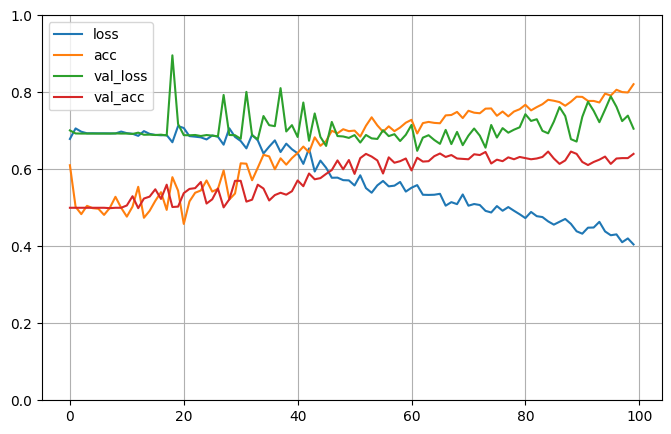

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [47]:
# model.save("cats_and_dogs")

In [48]:
!tensorboard --bind_all --logdir=./my_logs --port=6006

/bin/bash: /home/kailash/anaconda3/envs/tensorflow1/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2022-09-20 15:42:42.668076: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 15:42:43.015911: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-20 15:42:44.038676: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/cuda/include:/usr/lib/cuda/lib64: